## COMP2006 -- Graded Lab 1

In this lab, you will gain some experience in **denoising** a dataset in the context of a specific objective. 

**Overall Objective**: Create a model that predicts rent prices as well as possible for typical New York City apartments.

**Data set**: make sure you use the data with the same number as your group number!

| Group | Data set |
| :-: | :-: |
| 1 | rent_1.csv |
| 2 | rent_2.csv |
| etc. | etc. |

**Important Notes:**
 - This lab is more open-ended so be prepared to think on your own, in a logical way, in order to solve the problem at hand
     - You should be able to support any decision you make with logical evidence
 - The data looks like the data we have been using in class but it has other **surprises**
     - Be sure to investigate the data in a way that allows you to discover all these surprises
 - Use [Chapter 5](https://mlbook.explained.ai/prep.html) of the textbook as a **guide**, except:
     - you only need to use **random forest** models;
     - exclude Section 5.5; 
 - Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
 - Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
 - Don't make assumptions!

I have broken the lab down into 4 main parts. 

### Part 0

Please provide the following information:
 - Group Number: 7
 - Group Members
     - Manuel Bishop Noriega 4362207
     - Robert E. Matney III 4364229

     

### Part 1 - Create and evaluate an initial model

#### Code (15 marks)

In [1]:
# importing panda to the code, to use dataframes.
import pandas as pd

# getting the csv file rent opened in a variable holding a dataframe
df = pd.read_csv("rent_7.csv")

# getting how many vectors/records of data are in file
print(df.shape)

# creating table with just these columns of data with numbers
# it would also be possible to convert non-numeric data columns to numbers and added if relevant
df_num = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price', 'num_desc_words', 'num_features']]

# separating features vector and target columns
X_train = df_num.drop('price', axis=1)
y_train = df_num['price']

# creating an appropriate model with suitable hyper-parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1)

# fit model to the training data
rf.fit(X_train, y_train)

# getting a relationship between X_train and y_train
r2 = rf.score(X_train, y_train)
print(f"{r2:.4f}")

rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True)

rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

X, y = df_num.drop('price', axis=1), df_num['price']

errors = []
print(f"Validation MAE trials: ", end='')
for i in range(7):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f"${e:.0f} ", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

(20000, 16)
0.3588
OOB score -0.6319
Validation MAE trials: $895 $1053 $970 $1606 $2113 $3654 $957 
Average validation MAE $1607


                Importance
Feature                   
latitude         12.567779
bathrooms         6.824058
longitude         0.865843
num_desc_words   -9.989793
bedrooms        -25.336098
num_features    -47.262706


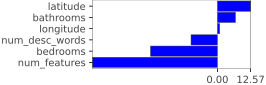

In [3]:
from rfpimp import *
I=importances(rf,X,y)
print(I)
plot_importances(I,color='blue')

#### Explanation (5 marks)
Please provide an explanation and justification for the code submitted in **Part 1** in the context of the overall objective. 

**----------------------------- U P D A T E ---------------------------**

In summary, we're setting a baseline for our model by feeding it with all available numeric fields and see how it performs. WHY? because so far, numeric data is the only thing we can handle, and our overall goal is to create a model making rent price predictions for typical apartments in NYC. From this point, we can try differnt things and compare results against this first version to see if we're improving our model performance.

**---------------------------------------------------------------------**


To start with the was getting the number of data entery rows and columns in the csv file.

Then we are training the machine based on the data that is given to look for a type of outcome. Trying to preform a model to help with trying to find a relationship between all of the data. R2 low score suggested no relationship found or noisiy data. We proceeded to confirm this in the next steps.

Next we are trying to use the model and what the machine has learned from the model to predict the average apartmet rent price. 

Then we did several valiation trails for get different amount of data to get the MAE.

From the data that is collected we get a MAE from that.

Results from oob score and MAE average validation showed our model performs really bad making predictions. But before concluding there's no relationship between our features vector and target we should make sure our data set is free of inconsistencies, errors or outliers.

### Part 2 - Denoise the data

This section should only include the code necessary to **denoise** the data, NOT the code necessary to identify inconsistencies, problems, errors, etc. in the data. 

#### Code (25 marks)

In [4]:
# DENOISING DATA, next two lines get rid of outliers or errors regarding apts location and prices.
#narrowing prices range to consider only reasonable ones (excludes also negative values)
df_clean = df_num[(df_num.price>1_000) & (df_num.price<10_000)]


#delimiting coverage area to new york city only.
df_clean = df_clean[(df_clean['latitude']>40.55) &
        (df_clean['latitude']<40.94) &
        (df_clean['longitude']>-74.1) &
        (df_clean['longitude']<-73.67)]

#removing negative values from this feature since having negative values here doesn't make sense
df_clean = df_clean[(df_clean.num_features>1)]
df_clean.describe()

,bathrooms,bedrooms,longitude,latitude,price,num_desc_words,num_features
count,14958.000000,14958.000000,14958.000000,14958.000000,14958.000000,14958.000000,14958.000000
mean,1.197018,1.525204,-73.974226,40.750294,3556.562575,92.381602,6.249967
std,0.433125,1.106002,0.027757,0.037947,1415.458060,58.200505,3.602652
min,0.000000,0.000000,-74.094000,40.571200,1034.000000,0.000000,2.000000
25%,1.000000,1.000000,-73.992700,40.728700,2579.250000,54.000000,3.000000
50%,1.000000,1.000000,-73.978700,40.750450,3200.000000,87.000000,5.000000
75%,1.000000,2.000000,-73.956600,40.772375,4200.000000,121.000000,8.000000
max,4.000000,8.000000,-73.700100,40.906700,9995.000000,663.000000,36.000000


### Part 3 - Create and evaluate a final model

#### Code (15 marks)

In [5]:
X, y = df_clean.drop('price', axis=1), df_clean['price']
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, #parallelize
                    oob_score=True) # get error estimate
rf.fit(X, y)
clean_oob_r2 = rf.oob_score_
print(f"Validation OOB score {clean_oob_r2: 4f}")

errors = []
print(f"Valiation MAE trials:", end='')
for i in range(7):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f"${e:.0f} ", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lm = Lasso(alpha=0.5) # create linear model
lm.fit(X_train, y_train)
print(f"LM Training score {lm.score(X_train, y_train):.4f}")
print(f"LM Validation score {lm.score(X_test, y_test):.4f}")

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 2000)
gbr.fit(X_train, y_train)
print(f"GB Training score {gbr.score(X_train, y_train):.4f}")
print(f"GB Validation score {gbr.score(X_test, y_test):.4f}")

Validation OOB score  0.809789
Valiation MAE trials:$401 $411 $414 $400 $392 $406 $408 
Average validation MAE $405
LM Training score 0.5829
LM Validation score 0.5809
GB Training score 0.8862
GB Validation score 0.7901


                Importance
Feature                   
bathrooms         0.571369
longitude         0.501351
bedrooms          0.480958
latitude          0.341543
num_features      0.091960
num_desc_words    0.075301


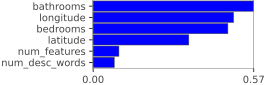

In [6]:
from rfpimp import *
I=importances(rf,X,y)
print(I)
plot_importances(I,color='blue')

#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 3** in the context of the overall objective. 

Now we run our model with denoised dataset (in part 2) to see how much its scores are improved. Results are way better than before, next, we'll compared how this models performs compared to other 2 models

Then the Lasso is a linear model to see if it will pull the data in a better way and see it if gives a better score. It does not.

Then we tried the gradient boosting model to see if it would give a different score for the data.  It did not do any better either.

### Part 4 - Document the problems (35 marks)

In this part, please use the table below to document your understanding of all the data issues you discovered. Note that **no code** should be included, as that should be covered in **Part 2**. Also, note that even if one line of code fixed a few problems, you should list each problem separately in the table below, so be sure you have investigated the data properly. For example, if the list `[-6, 5, 0, 50]` represents heights of adults, the -6, 0, and 50 would represent three data issues to be included in the table below, even though one line of code may be able to address all of them. 

| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- | 
| example problem 1: The longitude and Latitude both have some data entry that have 0.  | Which is this impossible because if it was the case then those apartments would not be in the area of New York but somewhere out in the Ocean or the equator. |  So, what needs to be done is to find all the data entry sets that have either the longitude or latitude set as 0 (or other outliers) and remove them from the model. | This fix is appropriate because those data sets with those number could be good data in the rest of the columns. The data could have been entered wrong or mistyped. |
|  example problem 2: The such degree in the price being so low to the price being so high to get the mead of the price of apartments rentals. | The problem with there be extreme low prices and extreme high prices is that it throws off the mean average price for the apartments rentals.    | So in order to fix this we filtered the data to get only the records with appartment prices between $1,000 and $10,000. | What this will do is help remove any mistakes that could have been made in either mistyping or just given the wrong data by accident. |
| example problem 3: num_features field/feature has negative values, specifically -2000  | As we understand, num_features is about the number of features the apartment has. Considering that, what does a negative value for this feature would mean? Lack of features? Doesn't make sense. | Then, considering this field should have only positive values, we filter values removing all negatives | Despite the fact this feature may be useless to make predictions or even worsen our model performance, at least we are sure now that all values are valid here. We won't make assumptions and let the model tell us. |
